# Allow HTML

By default, the HTML content in your tables is escaped. You can change this by setting `allow_html=True`.

```{warning}
Please make sure that you trust the content of your tables before allowing HTML content. See also this datatable page on [security](https://datatables.net/manual/security).
```

## Text formatting

When you allow HTML content, you can have formatted text,
links or even images in your tables:


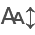

In [1]:
import pandas as pd

import itables

itables.init_notebook_mode()

itables.show(
    pd.Series(
        [
            "<b>bold</b>",
            "<i>italic</i>",
            '<a href="https://github.com/mwouts/itables">link</a>',
        ],
        name="HTML",
    ),
    allow_html=True,
)

## Images in a table

In [2]:
df = itables.sample_dfs.get_countries(html=False)

df["flag"] = [
    '<a href="https://flagpedia.net/{code}">'
    '<img src="https://flagpedia.net/data/flags/h80/{code}.webp" '
    'alt="Flag of {country}"></a>'.format(code=code.lower(), country=country)
    for code, country in zip(df.index, df["country"])
]
df["country"] = [
    '<a href="https://en.wikipedia.org/wiki/{}">{}</a>'.format(country, country)
    for country in df["country"]
]
df["capital"] = [
    '<a href="https://en.wikipedia.org/wiki/{}">{}</a>'.format(capital, capital)
    for capital in df["capital"]
]
itables.show(df, allow_html=True)

## Base64 images

[Base64 encoded image](https://stackoverflow.com/a/8499716/9817073) are supported, too:

In [3]:
itables.show(
    pd.Series(
        {
            "url": '<img src="https://storage.googleapis.com/tfds-data/visualization/fig/mnist-3.0.1.png" height="50" alt="MNIST">',
            "base64": '<img src="data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAAUA'
            "AAAFCAYAAACNbyblAAAAHElEQVQI12P4//8/w38GIAXDIBKE0DHxgljNBAAO"
            '9TXL0Y4OHwAAAABJRU5ErkJggg==" alt="Red dot">',
        },
        name="Images",
    ),
    allow_html=True,
)